core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '3', '18', '27', '14', '2', '20', '11', '77', '24']


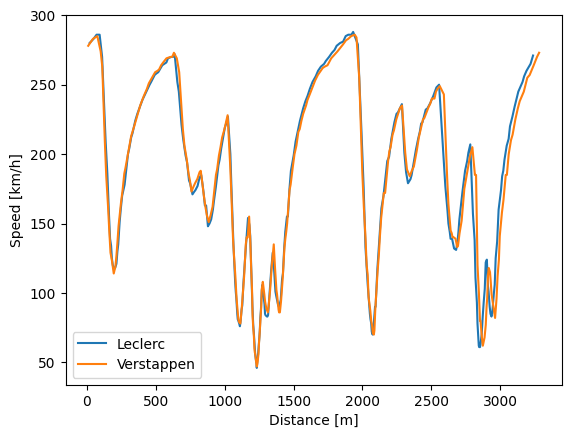

In [1]:
import fastf1
import matplotlib.pyplot as plt

# Enable cache storage
fastf1.Cache.enable_cache('cache') 

session = fastf1.get_session(2024, 'Monaco', 'Q')  # Monaco GP Qualifying 2024
session.load()

# Drivers' laps
lec = session.laps.pick_drivers('LEC').pick_fastest()
ver = session.laps.pick_drivers('VER').pick_fastest()

# Get telemetry
lec_tel = lec.get_car_data().add_distance()
ver_tel = ver.get_car_data().add_distance()

# Plot speed trace
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='Leclerc')
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='Verstappen')
plt.xlabel("Distance [m]")
plt.ylabel("Speed [km/h]")
plt.legend()
plt.show()
